# Import all library

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 

# Loaing the data

In [2]:
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [3]:
# Shape of the input sets
input_train_shape = input_train.shape
input_test_shape = input_test.shape 

# Keras layer input shape
input_shape = (input_train_shape[1], input_train_shape[2], 1)

# Reshape the training data to include channels
input_train = input_train.reshape(input_train_shape[0], input_train_shape[1], input_train_shape[2], 1)

input_test = input_test.reshape(input_test_shape[0], input_test_shape[1], input_test_shape[2], 1)

In [4]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize input data
input_train = input_train / 255
input_test = input_test / 255

# Creating model without Batch Normalization

In [5]:
batch_size = 250
no_epochs = 6
no_classes = 10
validation_split = 0.2
verbosity = 1

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [7]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [8]:
earlyStopping = EarlyStopping(monitor='val_loss',patience=3)

In [9]:
history = model.fit(
    input_train, target_train,
    batch_size=batch_size,
    epochs=no_epochs,
    verbose=verbosity,
    validation_split=validation_split,
    callbacks=[earlyStopping])

Epoch 1/6
192/192 [==============================] - 34s 176ms/step - loss: 0.3852 - accuracy: 0.8985 - val_loss: 0.1531 - val_accuracy: 0.9567
Epoch 2/6
192/192 [==============================] - 18s 96ms/step - loss: 0.1161 - accuracy: 0.9661 - val_loss: 0.0911 - val_accuracy: 0.9740
Epoch 3/6
192/192 [==============================] - 18s 95ms/step - loss: 0.0777 - accuracy: 0.9781 - val_loss: 0.0720 - val_accuracy: 0.9797
Epoch 4/6
192/192 [==============================] - 18s 95ms/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.0665 - val_accuracy: 0.9793
Epoch 5/6
192/192 [==============================] - 20s 104ms/step - loss: 0.0469 - accuracy: 0.9865 - val_loss: 0.0685 - val_accuracy: 0.9793
Epoch 6/6
192/192 [==============================] - 19s 100ms/step - loss: 0.0404 - accuracy: 0.9886 - val_loss: 0.0579 - val_accuracy: 0.9820


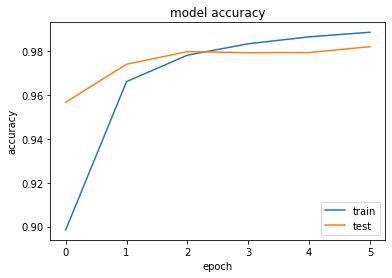

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [11]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.048002857714891434 / Test accuracy: 0.9847000241279602


# Model with Batch Normalization

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(no_classes, activation='softmax'))

In [13]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    input_train, target_train,
    batch_size=batch_size,
    epochs=no_epochs,
    verbose=verbosity,
    validation_split=validation_split,
    callbacks=[earlyStopping]
)

Epoch 1/6
192/192 [==============================] - 35s 178ms/step - loss: 0.2023 - accuracy: 0.9438 - val_loss: 2.8909 - val_accuracy: 0.2132
Epoch 2/6
192/192 [==============================] - 33s 172ms/step - loss: 0.0588 - accuracy: 0.9844 - val_loss: 1.5566 - val_accuracy: 0.4734
Epoch 3/6
192/192 [==============================] - 33s 172ms/step - loss: 0.0334 - accuracy: 0.9912 - val_loss: 0.1766 - val_accuracy: 0.9545
Epoch 4/6
192/192 [==============================] - 34s 177ms/step - loss: 0.0216 - accuracy: 0.9947 - val_loss: 0.0729 - val_accuracy: 0.9768
Epoch 5/6
192/192 [==============================] - 33s 173ms/step - loss: 0.0120 - accuracy: 0.9979 - val_loss: 0.0627 - val_accuracy: 0.9811
Epoch 6/6
192/192 [==============================] - 34s 177ms/step - loss: 0.0064 - accuracy: 0.9993 - val_loss: 0.0507 - val_accuracy: 0.9843


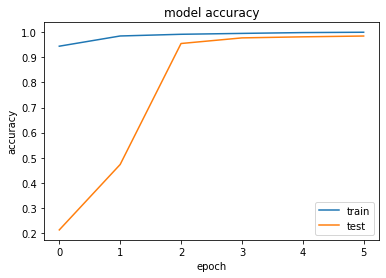

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [16]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.052501171827316284 / Test accuracy: 0.9840999841690063
